### This jupyter notebook analyzes the  abcd 2.01 data and profile participants for further investigation

In [1]:
# import related libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
# to avoid memory issue, delete the second row, which is the questionnaire 
infile = open('pdem02.txt','r').readlines()
with open('abcd_demo.txt','w') as outfile:
    for index,line in enumerate(infile):
        """
        find the index not eaqual to one 
        then write the file 
        """
        if index != 1:
            outfile.write(line)

In [4]:
# read data into pandas
# abcd study data file seperate by "\t"
abcd_demo = pd.read_csv('abcd_demo.txt',sep = '\t')

## to clean the data and proflie participants

In [5]:
abcd_demo['subjectkey'].nunique()

11875

#### age of children

In [6]:
# convert age to years
abcd_demo['age'] = abcd_demo['interview_age']/12
abcd_demo['interview_age'].value_counts()

108    1054
131     769
109     651
110     557
116     476
111     474
118     469
129     467
120     458
130     455
117     454
124     447
115     446
125     445
121     444
122     439
114     436
126     435
127     431
119     431
123     429
113     415
128     398
112     395
Name: interview_age, dtype: int64

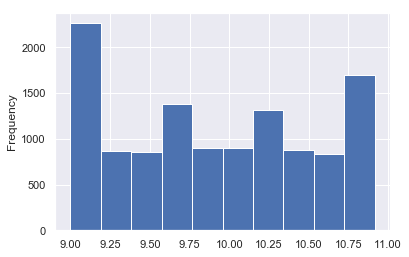

In [7]:
abcd_demo['age'].plot.hist()

### age of parent

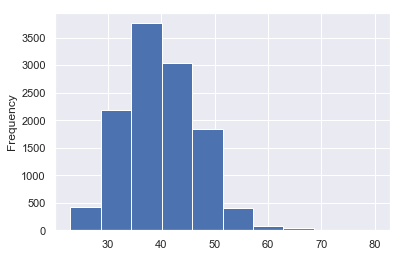

In [8]:
abcd_demo['age_prnt'] = abcd_demo['demo_prnt_age_v2']

# quick viz age of parent 
abcd_demo['age_prnt'].plot.hist()

#### Race
1. white
2. africa american
3. hispanic
4. others

In [9]:
# equivalent method to sql case when 
abcd_demo['race'] = 4
abcd_demo.loc[(abcd_demo.demo_race_a_p___10 ==1) & 
              (abcd_demo.demo_ethn_v2 != 1) & 
              (abcd_demo.demo_race_a_p___11 !=1), 'race'] = 1
abcd_demo.loc[(abcd_demo.demo_race_a_p___11 == 1) &
              (abcd_demo.demo_ethn_v2 != 1) &
               (abcd_demo.demo_race_a_p___10 != 1), 'race'] =2
abcd_demo.loc[
   abcd_demo.demo_ethn_v2 ==1, 'race'] =3 

In [10]:
abcd_demo['race'].value_counts()

1    6724
3    2409
2    1860
4     882
Name: race, dtype: int64

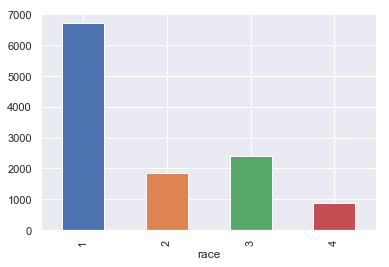

In [11]:
# group by race and subjectkey as the key for the table 
abcd_demo.groupby('race')['subjectkey'].nunique().plot.bar()

### sex

In [12]:
abcd_demo['gender'].value_counts()


M    6188
F    5681
Name: gender, dtype: int64

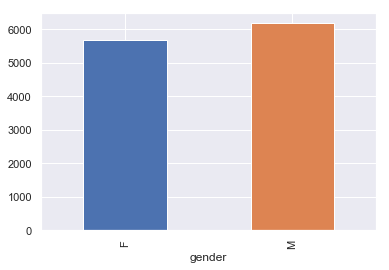

In [13]:
abcd_demo.groupby('gender')['subjectkey'].nunique().plot(kind = 'bar')

### children born in us
1 = 'yes'
2 = 'no'

In [14]:
abcd_demo['born_us'] = 0
abcd_demo.loc[ abcd_demo.demo_origin_v2 == 189, 'born_us'] = 1 # '189' is usa code 
abcd_demo['born_us'].value_counts()

1    11509
0      366
Name: born_us, dtype: int64

### marital status
1 = married / living with partner   
2 = divorced /separted  
3 = signle never married  
4 = widowed  
'' missing 

In [15]:
abcd_demo['demo_prnt_marital_v2'].value_counts() # change the coding based on above notes 

1.0      7990
5.0      1456
3.0      1082
6.0       689
4.0       463
2.0        97
777.0      95
Name: demo_prnt_marital_v2, dtype: int64

In [16]:
abcd_demo['marital_prnt'] = 1
abcd_demo.loc[abcd_demo.demo_prnt_marital_v2 == 6, 'marital_prnt' ] = 1
abcd_demo.loc[(abcd_demo.demo_prnt_marital_v2 == 3) | 
             (abcd_demo.demo_prnt_marital_v2 == 4), 'marital_prnt'] = 2
abcd_demo.loc[abcd_demo.demo_prnt_marital_v2 ==5, 'marital_prnt'] = 3
abcd_demo.loc[abcd_demo.demo_prnt_marital_v2 == 2, 'marital_prnt'] = 4
abcd_demo.loc[abcd_demo.demo_prnt_marital_v2== 777, 'marital_prnt'] = np.nan

In [17]:
abcd_demo['marital_prnt'].value_counts(dropna=False)


 1.0    8682
 2.0    1545
 3.0    1456
 4.0      97
NaN       95
Name: marital_prnt, dtype: int64

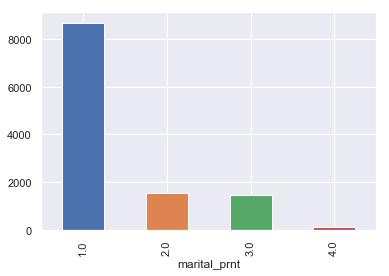

In [18]:
#abcd_demo['marital_prnt'].plot.hist()
abcd_demo.groupby('marital_prnt')['subjectkey'].nunique().plot.bar()

### parent education
1 <= high school or GED  
2 = some college or associate degree  
3 = bacholor degree  
4 =  graducate degree (master,phd, md, etc...)  
'' missing 

In [19]:
abcd_demo['demo_prnt_ed_v2'].value_counts(dropna=False)

 18.0     3331
 19.0     2281
 15.0     1951
 13.0      990
 16.0      873
 17.0      662
 21.0      380
 20.0      334
 14.0      268
 11.0      193
 12.0      182
 9.0       136
 10.0      106
 6.0        62
 8.0        61
 7.0        21
 777.0      17
 3.0        10
 4.0         8
 5.0         3
NaN          3
 1.0         2
 2.0         1
Name: demo_prnt_ed_v2, dtype: int64

In [20]:
abcd_demo['prnt_edu'] = np.nan
abcd_demo.loc[abcd_demo.demo_prnt_ed_v2 < 15 , 'prnt_edu'] = 1 # <= high school or GED equivalent
abcd_demo.loc[abcd_demo.demo_prnt_ed_v2.isin([15,16,17]), 'prnt_edu'] = 2 # some college, associate degree
abcd_demo.loc[abcd_demo.demo_prnt_ed_v2 == 18,'prnt_edu'] = 3 # bacholor degree
abcd_demo.loc[abcd_demo.demo_prnt_ed_v2.isin([19,20,21]), 'prnt_edu'] = 4 # graduate degree
abcd_demo.loc[abcd_demo.demo_prnt_ed_v2 == 777,'prnt_edu'] = np.nan #refuse to anwser

In [21]:
abcd_demo['prnt_edu'].value_counts(dropna=False)

 2.0    3486
 3.0    3331
 4.0    2995
 1.0    2043
NaN       20
Name: prnt_edu, dtype: int64

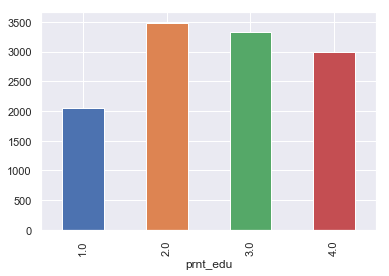

In [22]:
abcd_demo.groupby('prnt_edu')['subjectkey'].nunique().plot.bar()

### employment  
#### based on demo_prnt_empl_v2 and demo_prnt_empl_time  
1 = full time  
2 = part time  
3 = umployment (temp laid off, looking for work, umpymed not looking for work)  
4 = other  (student, stay at home, sick leave, maternity leave, etc...)  
missing  = refuse to answers  

*note: there are 41 participants answered demo_prnt_empl_v2 but not demo_prnt_empl_time*

In [23]:
abcd_demo['prnt_empl'] = np.nan
abcd_demo.loc[(abcd_demo.demo_prnt_empl_time ==1) & (abcd_demo.demo_prnt_empl_v2 == 1),'prnt_empl'] = 1
abcd_demo.loc[(abcd_demo.demo_prnt_empl_time ==2) & (abcd_demo.demo_prnt_empl_v2 == 1),'prnt_empl'] = 2
abcd_demo.loc[(abcd_demo.demo_prnt_empl_v2.isin([2,3,11])),'prnt_empl'] = 3
abcd_demo.loc[(abcd_demo.demo_prnt_empl_v2.isin([4,5,6,7,8,9,10])),'prnt_empl'] = 4                                                                   
abcd_demo.loc[abcd_demo.demo_prnt_empl_v2 == 777, 'prnt_empl'] = np.nan

In [24]:
abcd_demo['prnt_empl'].value_counts(dropna=False)

 1.0    5956
 4.0    2931
 2.0    2218
 3.0     673
NaN       97
Name: prnt_empl, dtype: int64

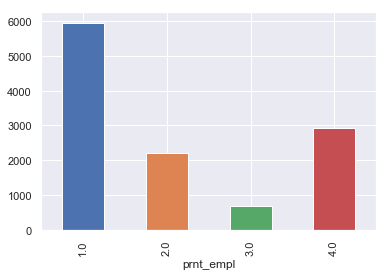

In [25]:
abcd_demo.groupby('prnt_empl')['subjectkey'].nunique().plot.bar()

### raise child(ren) alone - problematic 
based on demo_prnt_prtnr_v2  
***codebook indicates no value 3 in the variable but shows 3***

In [26]:
abcd_demo['demo_prnt_prtnr_v2'].value_counts()

1.0      9478
2.0      2271
777.0     123
Name: demo_prnt_prtnr_v2, dtype: int64

### famliy income   
based on demo_comb_income_v2	

In [27]:
abcd_demo['demo_comb_income_v2'].value_counts()

9.0      3316
8.0      1571
7.0      1499
10.0     1249
6.0       934
5.0       653
4.0       523
777.0     511
999.0     504
2.0       422
1.0       416
3.0       274
Name: demo_comb_income_v2, dtype: int64

In [28]:
abcd_demo['comb_income'] = abcd_demo['demo_comb_income_v2']
abcd_demo.loc[(abcd_demo.demo_comb_income_v2 == 777) | (abcd_demo.demo_comb_income_v2 == 999), 'comb_income'] = np.nan

In [29]:
abcd_demo['comb_income'].value_counts(dropna=False)

 9.0     3316
 8.0     1571
 7.0     1499
 10.0    1249
NaN      1018
 6.0      934
 5.0      653
 4.0      523
 2.0      422
 1.0      416
 3.0      274
Name: comb_income, dtype: int64

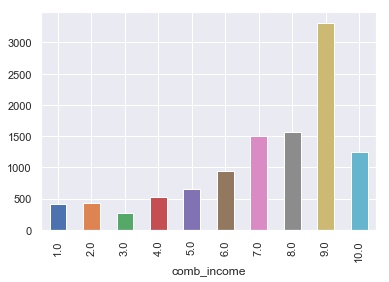

In [30]:
abcd_demo.groupby('comb_income')['subjectkey'].nunique().plot.bar()

### evicted experience (parents or immediate familiy)
based on demo_fam_exp4_v2   
777 = missing 

In [31]:
abcd_demo['demo_fam_exp4_v2'].value_counts()

0.0      11673
1.0        168
777.0       30
Name: demo_fam_exp4_v2, dtype: int64

In [32]:
abcd_demo['evct_exp'] = abcd_demo['demo_fam_exp4_v2']
abcd_demo.loc[abcd_demo.demo_fam_exp4_v2 == 777,'evct_exp'] = np.nan
abcd_demo['evct_exp'].value_counts()

0.0    11673
1.0      168
Name: evct_exp, dtype: int64

### unmet healthcare needs
based on demo_fam_exp6_v2 (see a doctor) and demo_fam_exp7_v2 (see a dentist)   
1 = yes, have either doctor or dentist or both unmet needs  
0 = no, no such unmet needs

In [33]:
abcd_demo['demo_fam_exp6_v2'].value_counts()

0.0      11211
1.0        623
777.0       38
Name: demo_fam_exp6_v2, dtype: int64

In [34]:
abcd_demo['demo_fam_exp7_v2'].value_counts()

0.0      10612
1.0       1213
777.0       47
Name: demo_fam_exp7_v2, dtype: int64

In [35]:
abcd_demo['healthcare_unmet'] = 0
abcd_demo.loc[(abcd_demo.demo_fam_exp6_v2 == 1) |(abcd_demo.demo_fam_exp7_v2 == 1), 'healthcare_unmet'] = 1
abcd_demo.loc[(abcd_demo.demo_fam_exp6_v2 == 777) &(abcd_demo.demo_fam_exp7_v2 == 777), 'healthcare_unmet'] = np.nan

In [36]:
abcd_demo['healthcare_unmet'].value_counts(dropna=False)

 0.0    10480
 1.0     1361
NaN        34
Name: healthcare_unmet, dtype: int64

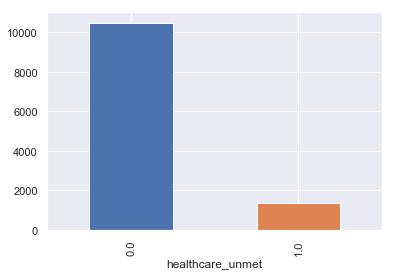

In [37]:
abcd_demo.groupby('healthcare_unmet')['subjectkey'].nunique().plot.bar()

### religion ban use substance (alcohol and drugs)
based on demo_yrs_2a_2 and demo_yrs_2b_2	

In [38]:
abcd_demo['demo_yrs_2a_2'].value_counts() # religion ban alcohol

0.0      4330
1.0      1564
999.0     548
Name: demo_yrs_2a_2, dtype: int64

In [39]:
abcd_demo['demo_yrs_2b_2'].value_counts()

0.0      3302
1.0      2314
999.0     824
Name: demo_yrs_2b_2, dtype: int64

In [40]:
abcd_demo['rlgn_sub'] = 0
abcd_demo.loc[(abcd_demo.demo_yrs_2a_2 == 1) | (abcd_demo.demo_yrs_2b_2) == 1, 'rlgn_sub'] = 1
abcd_demo.loc[(abcd_demo.demo_yrs_2a_2 == 999) & (abcd_demo.demo_yrs_2b_2 == 999), 'rlgn_sub'] = 2

In [41]:
abcd_demo['rlgn_sub'].value_counts(dropna = False)

0    8729
1    2670
2     476
Name: rlgn_sub, dtype: int64

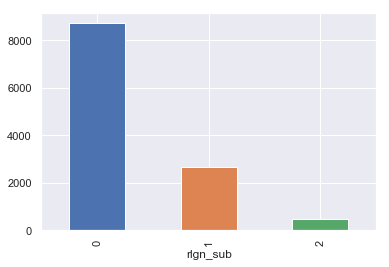

In [42]:
abcd_demo.groupby('rlgn_sub')['subjectkey'].nunique().plot.bar()